共同庫com使用說明

# 如何引入
```python
import sys 
sys.path.append(".\\")
import com
com.function() #調用函數
```


In [1]:
import sys 
sys.path.append(".\\")
import com

# 定義型態
## {az}data 全筆資料
adata[i][j][k]
* i:第幾個人
* j:第幾筆資料
* k:第幾個關節(維度)


## res 結果資料
```python
[ [第一人被分為第一類,第一人被分為第二類,第一人被分為第三類,...],
  [第二人被分為第一類,第二人被分為第二類,第二人被分為第三類,...],
  [第三人被分為第一類,第三人被分為第二類,第三人被分為第三類,...],
    ...
]
```

# 函數說明

## dis(a,b)
計算2點在多維空間中之距離
* 傳入值
    * a=[a1,a2,a3,...,an]，第一點
    * b=[b1,b2,b3,...,bn]，第二點
* 傳回值
    * 浮點數，兩點在多維空間中之距離



In [8]:
a=[0,0]
b=[3,4]
com.dis(a,b)

5.0

## ang(j1,j2,j3)
計算角∠j1-j2-j3，單位為度度量
* 傳入值
    * j1=[x1,y1,z1]，起點
    * j2=[x2,y2,z2]，轉折點
    * j3=[x3,y3,z3]，終點
* 傳回值
    * 浮點數，角度值，度度量



In [9]:
j1=[0,0,0]
j2=[10,10,10]
j3=[15,15,15]
com.ang(j1,j2,j3)

180.0

## tansdata(who,expnum,nowmax,where)
批次將一回實驗之數據(座標)轉成38個關節角度資料，並輸出存檔
* 傳入值
    * who="字串"，實驗者代號(WCZAX)
    * expnum=整數，第幾回實驗
    * nowmax=整數，現在最大輸出編號，用於壘加數值
    * where="字串"，輸出目錄
* 傳回值
    * 整數，這回實驗增加了幾筆角度資料
* 使用範例

```python
dd=1
for i in range(1,105+1):
    dd=dd+tansdata("W",i,dd,"角度資料\\0730(0.25)(1+1點)(38點)\\")
```

## datatoang(data)
將一筆座標資料轉為角度資料
* 傳入值
    * data={"關節名":[x,y,z],...,"time":123}，一筆座標資料
* 傳回值
    * 浮點數之陣列，依序之19個角度值



## readdata(datanum,people,where)
將角度資料檔讀入程式
* 傳入值
    * datanum=[n0,n1,n2,...]，每個人要讀入幾筆資料
    * people=整數，要讀入幾個人的資料
    * where="字串"，角度資料目錄
* 傳回值
    * adata[i][j][k]，全筆資料，`i`某個人，`j`某筆角度資料，`k`某個角度值

In [12]:
adata=com.readdata([495,467,482,512],4,"角度資料\\0730(0.25)(1+1點)(38點)\\")

## GLdata(adata)
過濾資料，當某個關節的角度值與其自己的該關節的平均值誤差超過一個角度值時，該筆資料不計
* 傳入值
    * adata=全筆資料
* 傳回值
    * bdata=過濾後之全筆資料

In [11]:
adata=com.GLdata(adata,40)

## randdata(adata)
打亂資料，以利後續切割資料
* 傳入值
    * adata=全筆資料
* 傳回值
    * bdata=打亂後之全筆資料


In [13]:
adata=com.randdata(adata)

## cutdata(adata,TrainDataFrom,TrainDataEnd,TestDataFrom,TestDataEnd)
切割資料，做為訓練資料與測試資料
* 傳入值
    * adata=全筆資料
    * TrainDataFrom=整數，從第幾筆資料開始做為訓練資料
    * TrainDataEnd=整數，到第幾筆資料結束做為訓練資料
    * TestDataFrom=整數，從第幾筆資料開始做為測試資料
    * TestDataEnd=整數，到第幾筆資料結束做為測試資料
* 傳回值
    * bdata=切割後之全筆訓練資料
    * cdata=切割後之全筆測試資料


In [14]:
bdata,cdata=com.cutdata(adata,0,350,350,377)

## printres(res,table,rec,pre,acc)
顯示及計算結果資料之召回率、精確度、準確度、f1調和平均數
* 傳入值
    * res=結果格式
    ```python
    [[第一人被分為第一類,第一人被分為第二類,第一人被分為第三類,...],
     [第二人被分為第一類,第二人被分為第二類,第二人被分為第三類,...],
     [第三人被分為第一類,第三人被分為第二類,第三人被分為第三類,...],
     ...
    ]
    ```
    * table，為1時顯示表格
    * rec，為1時顯示召回率，P(分為某|是某)
    * pre，為1時顯示精確度，P(是某|分為某)
    * acc，為1時顯示準確度，P(判斷為正確)
* 傳回值
    * 字典
    ```python
    {"ZHL":浮點數之陣列，各位的召回率,
     "JQL":浮點數之陣列，各位的精確度,
     "ZQL":浮點數，準確度,
     "f1TH":浮點數之陣列，各位的f1值,
     "f1THPJ":浮點數，f1之平均}
    ```

In [17]:
adata=com.randdata(adata)
bdata,cdata=com.cutdata(adata,0,100,100,200)
MyKNN=com.KNN(bdata)
res=MyKNN.bigtest(cdata,4)
com.printres(res,1,1,1,1)

,0,1,2,3
0,68,8,15,9
1,6,72,17,5
2,10,3,80,7
3,18,12,13,57


召回率
[0.68, 0.72, 0.8, 0.57]
精確率
[0.6666666666666666, 0.7578947368421053, 0.64, 0.7307692307692307]
準確率 0.6925
f1平均為: 0.6908223536268925


{'ZHL': [0.68, 0.72, 0.8, 0.57],
 'JQL': [0.6666666666666666, 0.7578947368421053, 0.64, 0.7307692307692307],
 'f1TH': [0.6732673267326732,
  0.7384615384615385,
  0.7111111111111111,
  0.6404494382022472],
 'f1THPJ': 0.6908223536268925}

## HT(x,y,xlabel,ylabel,title)
畫折線圖
* 傳入值
    * x=[x1,x2,x3,...,xn]
    * y=[y1,y2,y3,...,yn]
    * xlabel，字串，X軸之標籤
    * ylabel，字串，Y軸之標籤
    * title，字串，可省，預設為X軸對Y軸之影響
* 傳回值
    * 無

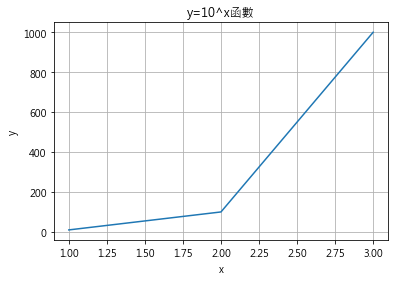

In [18]:
com.HT([1,2,3],[10,100,1000],"x","y","y=10^x函數")

## divdata(adata)
將全筆資料分為資料及標籤
* 傳入值
    * adata，全筆資料
* 傳回值
    * data，由每一筆資料(一維陣列)組成之二維陣列
    * label，data對應之標籤(一維陣列)
* 使用範例
```python
bdata, blabel = divdata(adata)
```

# 類別:KNN
## KNN:建構子KNN(adata)
建立實體
* 傳入值
    * adata=訓練資料
* 傳回值
    * 無
* 使用範例
    * MyKNN為物件實體
    * adata為訓練資料
    ```python
    MyKNN=com.KNN(adata)
    ```

In [20]:
MyKNN=com.KNN(bdata)

## KNN:test(testdata,k)
測試一筆資料
* 傳入值
    * testdata 為一筆測試資料
    * k，整數，KNN之K值
* 傳回值
    * 整數，判斷結果為誰


In [22]:
print(MyKNN.test(cdata[1][0]))

1


## KNN:bigtest(testdata,k)
測試多人多筆資料
* 傳入值
    * testdata 為多人多筆測試資料
    * k，整數，KNN之K值
* 傳回值
    * 結果資料格式
* 使用範例
    * adata為全筆資料
    * bdata為訓練資料
    * cdata為測試資料
    ```python
    adata=randdata(adata)
    bdata,cdata=cutdata(adata)
    MyKNN=KNN(bdata)
    res=MyKNN.bigtest(cdata,4)
    com.printres(res)
    ```

In [24]:
res=MyKNN.bigtest(cdata,4)
com.printres(res)

,0,1,2,3
0,68,8,15,9
1,6,72,17,5
2,10,3,80,7
3,18,12,13,57


召回率
[0.68, 0.72, 0.8, 0.57]
精確率
[0.6666666666666666, 0.7578947368421053, 0.64, 0.7307692307692307]
準確率 0.6925
f1平均為: 0.6908223536268925


{'ZHL': [0.68, 0.72, 0.8, 0.57],
 'JQL': [0.6666666666666666, 0.7578947368421053, 0.64, 0.7307692307692307],
 'f1TH': [0.6732673267326732,
  0.7384615384615385,
  0.7111111111111111,
  0.6404494382022472],
 'f1THPJ': 0.6908223536268925}

# 3Q